In [1003]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [1004]:
dfr=pd.read_csv('tempSiteRatings.csv')
dfd=pd.read_csv('tempUrlMetrics.csv')

In [1005]:
dfd['rating']=dfr['rating']
dfd.drop(['slno','url'],1,inplace=True)
dfd.to_csv('data.csv')

In [1006]:
data=pd.read_csv('data.csv')
#data

In [1007]:
data.drop(['Unnamed: 0'],1, inplace=True)
data.drop(['p3','p4','p5'],1, inplace=True)

In [1008]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(13,'rating').index
columns
#np.sort(columns)

Index(['rating', 'p9', 'p3', 'p7', 'p13', 'p2', 'p8', 'p10', 'p6', 'p1', 'p4',
       'p12', 'p5'],
      dtype='object')

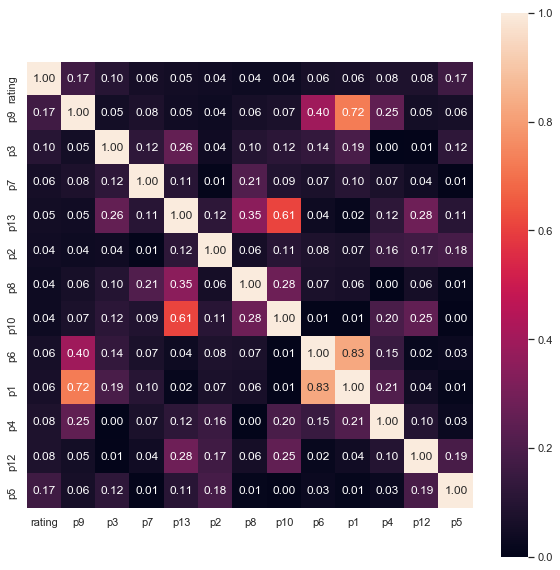

In [1009]:
fig, ax = plt.subplots(figsize=(10,10))    
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1)
heatmap = sns.heatmap(abs(correlation_map), cbar=True, annot=True, square=True, fmt='.2f',yticklabels=columns.values, xticklabels=columns.values)
plt.savefig('corr.png')
#plt.show()


In [1010]:
Y=data['rating'].values
X_temp=data[columns]
X_temp.drop(['rating'],1, inplace=True)
X=X_temp.values

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1011]:
data_dmatrix= xgb.DMatrix(data=X,label=Y)

In [1012]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle='True',test_size=0.5, random_state=1)

In [1013]:
def LinearReg():
    from sklearn.linear_model import LinearRegression
    reg =LinearRegression()
    return reg
def RidgeReg():
    from sklearn.linear_model import Ridge
    reg =Ridge()
    return reg
def ABReg():
    from sklearn.ensemble import AdaBoostRegressor
    reg=AdaBoostRegressor(random_state=0, n_estimators=100)
    return reg
def DTReg():
    from sklearn.tree import DecisionTreeRegressor
    reg=DecisionTreeRegressor(random_state=0)
    return reg
def MLPReg():
    from sklearn.neural_network import MLPRegressor
    reg=MLPRegressor(hidden_layer_sizes=(4,),activation='logistic',solver='adam', max_iter=10000,batch_size=10,)
    return reg
def LogReg():
    from sklearn.linear_model import LogisticRegression
    reg=LogisticRegression()
    return reg
def XGBReg():
    reg=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
    return reg
def RMS_test(reg):
    from sklearn.metrics import mean_squared_error
    Y_pred=reg.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)
def RMS_train(reg):
    from sklearn.metrics import mean_squared_error
    Y_pred=reg.predict(X_train)
    return mean_squared_error(Y_train, Y_pred)


In [1014]:
regLinear=LinearReg()
regLinear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1015]:
regRidge=RidgeReg()
regRidge.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [1016]:
regAB=ABReg()
regAB.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=0)

In [1017]:
regDT=DTReg()
regDT.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [1018]:
regMLP=MLPReg()
regMLP.fit(X_train,Y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [1019]:
regXGB=XGBReg()
regXGB.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [1020]:
test=[RMS_test(regLinear),RMS_test(regRidge),RMS_test(regAB),RMS_test(regDT),RMS_test(regMLP),RMS_test(regXGB)]
train=[RMS_train(regLinear),RMS_train(regRidge),RMS_train(regAB),RMS_train(regDT),RMS_train(regMLP),RMS_train(regXGB)]


In [1021]:
for i in zip(test,train):
    print(i)

(1.72684468740981, 0.48210005732067773)
(1.5464784807415362, 0.48496627092938993)
(0.6377821002591859, 0.07400755596759774)
(1.4723041371158399, 0.0)
(0.6016233822941285, 0.8157231560135603)
(2.440358139524471, 2.5461821540639455)


In [850]:
regLinear.coef_

array([ 6.73362018e-03,  1.89815336e-06,  3.67982390e-04, -2.56438668e-01,
       -5.31366898e-04, -6.75178717e-03,  7.41161096e-04, -5.29666999e-04,
       -8.13344271e-02, -2.30679104e-03, -2.43216791e-03])

In [851]:
columns

Index(['rating', 'p9', 'p7', 'p13', 'p2', 'p8', 'p10', 'p6', 'p1', 'p4', 'p12',
       'p5'],
      dtype='object')